<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_EXP_05_Logistic_Regression_Voice_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Logistic Regression`**

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/voice.csv')
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0.216693,0.034979,0.217677,0.190129,0.245677,0.055548,1.465933,4.380726,0.858511,0.158451,...,0.216693,0.168864,0.047151,0.279070,1.228871,0.023438,8.906250,8.882812,0.107802,female
680,0.201876,0.033005,0.205923,0.181697,0.223627,0.041930,1.947256,5.863924,0.843056,0.212057,...,0.201876,0.168647,0.047856,0.263736,0.794531,0.023438,8.085938,8.062500,0.061927,female
681,0.190641,0.030893,0.188939,0.173357,0.203061,0.029704,2.787304,10.953833,0.828384,0.190504,...,0.190641,0.154386,0.047619,0.277457,1.160156,0.023438,7.781250,7.757812,0.081754,female
682,0.207567,0.031920,0.206224,0.193444,0.229461,0.036017,2.360305,9.497020,0.841146,0.196610,...,0.207567,0.171274,0.047761,0.274286,0.883042,0.023438,4.968750,4.945312,0.119706,female


**Data preprocessing**

Handling missing and duplicate values

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data['label'])

Handling highly correlated values

<Axes: >

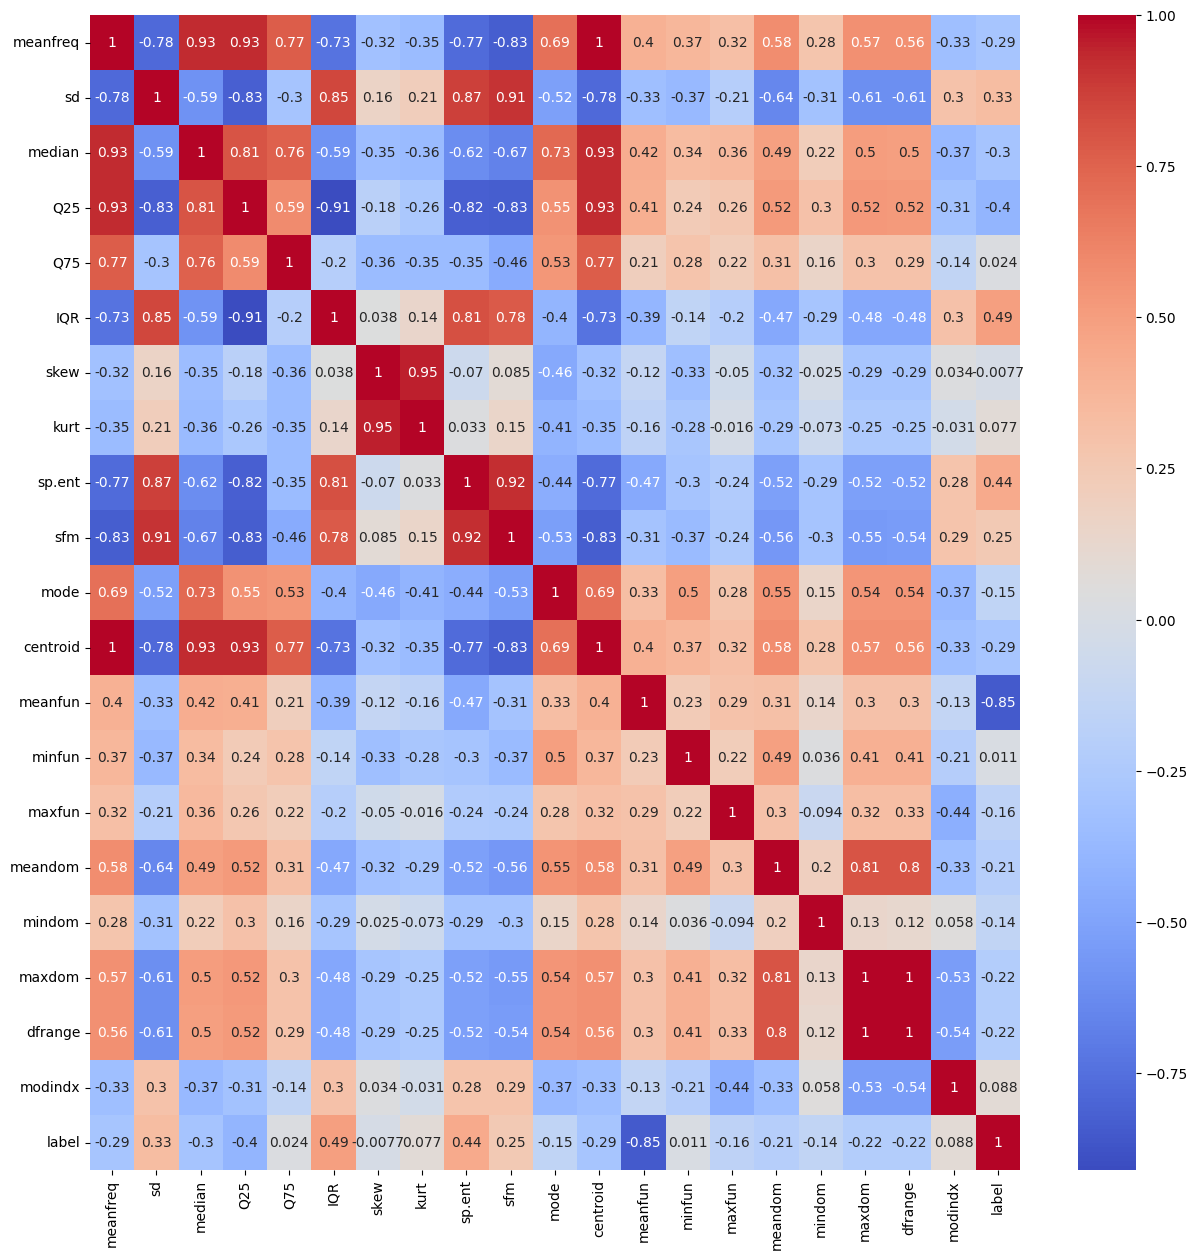

In [ ]:
plt.figure(figsize=(15,15))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
# #dropping highly correlated values
# data.drop(columns=['median','Q25','sfm','kurt','sp.ent','maxdom','meanfun','IQR','centroid'],inplace=True)

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(data)

array([[-3.96157388,  0.3766271 , -3.94482547, ..., -1.43701238,
        -1.56094458,  0.99926981],
       [-3.76126788,  0.55554568, -3.73553404, ..., -1.42366114,
        -1.0904607 ,  0.99926981],
       [-3.39760358,  1.51867903, -3.82510813, ..., -1.43478717,
        -1.14516813,  0.99926981],
       ...,
       [ 0.24731802, -1.56769614,  0.05920966, ...,  0.7726175 ,
        -0.83012887, -1.00219593],
       [ 0.79174597, -1.50780171,  0.50028106, ..., -0.02845678,
        -0.49086528, -1.00219593],
       [ 0.57607781, -1.21486588,  0.37554776, ...,  0.7726175 ,
        -0.55148063, -1.00219593]])

**Identifying dependent and independent values**

In [ ]:
x=data.drop('label',axis=1)
y=data['label']

**Performing train test split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


**Performing logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
logistic_fit = model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Creating classification report**

In [ ]:
from sklearn.metrics import classification_report
predictions = logistic_fit.predict(x_test)

# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           2       0.85      0.89      0.87        37

    accuracy                           0.86        69
   macro avg       0.86      0.85      0.85        69
weighted avg       0.86      0.86      0.85        69



**visualization**

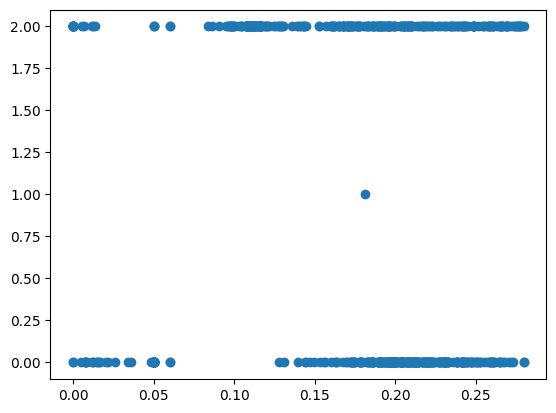

In [ ]:
plt.scatter(x['mode'],y)

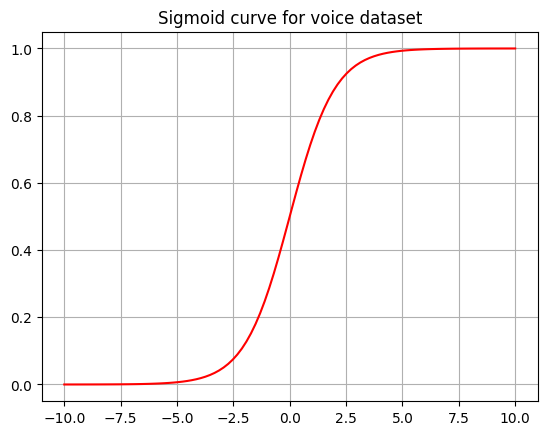

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) #define the sigmoid function fourmulae
x = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x)
plt.plot(x, sigmoid_values, label='Sigmoid Curve', color='r')
plt.title('Sigmoid curve for voice dataset')
plt.grid(True)
plt.show()